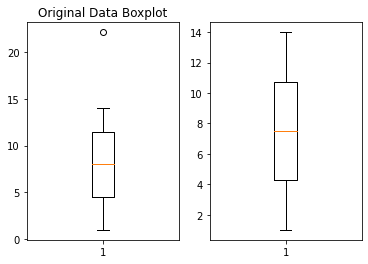

In [1]:
# 이상치 처리에 대해서 알아보아요!
import numpy as np
import matplotlib.pyplot as plt

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22.1])

figure = plt.figure()

ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)

ax1.set_title('Original Data Boxplot')
ax1.boxplot(data)

# numpy로 사분위 값을 구해서 Turkey Fence 방식으로 이상치를 판단해 보아요!
first = np.percentile(data, 25)  # 1사분위 값을 구해요!
third = np.percentile(data, 75)  # 3사분위 값을 구해요!
IQR_value = third - first

upper_fence = third + (IQR_value * 1.5)
lower_fence = first - (IQR_value * 1.5)

# boolean indexing을 이용해서 이상치를 추출해보아요!
# print(data[(data > upper_fence) | (data < lower_fence)])   # array([22.1])
# boolean indexing을 이용해서 이상치를 제거하고 나머지 데이터를 추출해요!
result = data[(data <= upper_fence) & (data >= lower_fence)]
ax2.boxplot(result)
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22.1])

mean = data.mean() # 8.473333333333333
std = data.std()   # 5.331974826980671

zscore_data = (data - mean) / std

print(zscore_data)

[-1.40160702 -1.21405925 -1.02651147 -0.8389637  -0.65141593 -0.46386816
 -0.27632038 -0.08877261  0.09877516  0.28632293  0.4738707   0.66141848
  0.84896625  1.03651402  2.55565098]


In [3]:
# scipy는 sklearn과 유사한 통계전용 모듈

from scipy import stats

data = np.array([-10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22.1])

zscore_threshold = 2.0 # 일반적인 기준.

outlier = data[np.abs(stats.zscore(data)) > zscore_threshold]
print(outlier)

data[np.isin(data, outlier, invert=True)]

[-10.   22.1]


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])

In [4]:
### 온도에 따른 오존량 예측 ==> Python 구현
### 결측치 처리와 이상치 처리도 같이 진행!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 다변수 함수에 대한 수치미분을 수행하는 함수
def numerical_derivative(f,x):    # x : ndarray [1.0  2.0]
    
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   # derivative_x : [0.0  0.0]
    
    # iterator를 이용해서 입력변수 x에 대한 편미분을 수행!
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        
        idx = it.multi_index 
        tmp = x[idx]              # tmp : 1.0
        
        x[idx] = tmp + delta_x    # x : ndarray [1.0001  2.0]
        fx_plus_delta = f(x)
        
        x[idx] = tmp - delta_x    # x : ndarray [0.9999  2.0]  
        fx_minus_delta = f(x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp              #  x : ndarray [1.0  2.0]  
        it.iternext()
        
    return derivative_x

# Raw Data Set Loading
df = pd.read_csv('./data/ozone.csv')
training_data = df[['Ozone', 'Temp']]

# 데이터에 결치값이 존재해요!
# 여기서는 결치값을 삭제할꺼예요!
training_data.dropna(how='any',
                     inplace=True)   # how='any' : 결치가 존재하는 행을 삭제

# 데이터에 이상치가 있는지 확인하고 제거
zscore_threshold = 2.0
outlier = training_data['Ozone'][(np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold)]
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]


# Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# Weight, bias
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function
def loss_func(input_data):
    W = input_data[0].reshape(1,1)
    b = input_data[1]
    
    y = np.dot(x_data,W) + b
    return np.mean(np.power(t_data-y,2))

# predict
def predict(x):
    y = np.dot(x,W) + b
    return y

# learning_rate
learning_rate = 1e-4

# 반복 학습
for step in range(300000):
    
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)  # [W b]
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(1,1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b:{}, loss:{}'.format(W, b, loss_func(input_param)))


C:\Users\user\AppData\Local\Temp\ipykernel_19736\71634947.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(how='any',


W : [[0.4970854]], b:[0.8623696], loss:495.51005715536337
W : [[0.6243291]], b:[-9.79367525], loss:457.19062738813443
W : [[0.74866679]], b:[-19.55385807], loss:425.4113955633887
W : [[0.86255247]], b:[-28.49358556], loss:398.75041907723056
W : [[0.96686476]], b:[-36.68182642], loss:376.38336907244206
W : [[1.0624084]], b:[-44.18175172], loss:357.6186803093442
W : [[1.1499205]], b:[-51.05122227], loss:341.87616870006104
W : [[1.2300762]], b:[-57.34323502], loss:328.6690926383956
W : [[1.3034939]], b:[-63.10633193], loss:317.58910347095934
W : [[1.37074]], b:[-68.38497445], loss:308.29361979408986


In [5]:
# 학습종료 후 예측 (Temp : 62)
predict_data = predict(np.array([[62]]))
print('온도가 62일때 오존량 : {}'.format(predict_data))  # [[16.88715564]]
                                                         # [[15.52149525]] 

온도가 62일때 오존량 : [[15.58480997]]


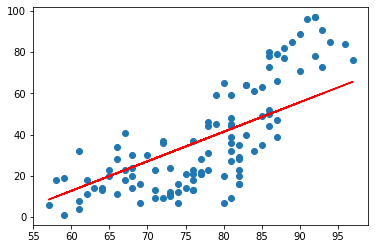

In [6]:
# 그래프로 표현해 보아요!
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), x_data.ravel()*W.ravel() + b, color='r')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19736\2561020127.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(how='any',


sklearn으로 구한 온도가 62도 일때의 오존량 : [[4.51299041]]


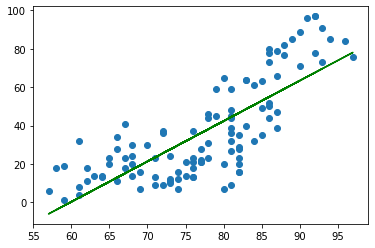

In [7]:
# 같은 데이터로 sklearn을 이용해서 구현해 보아요!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv('./data/ozone.csv')
training_data = df[['Ozone', 'Temp']]
training_data.dropna(how='any',
                     inplace=True)   # how='any' : 결치가 존재하는 행을 삭제

# 데이터에 이상치가 있는지 확인하고 제거
zscore_threshold = 2.0
outlier = training_data['Ozone'][(np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold)]
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]


# Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# model 생성
model = linear_model.LinearRegression()

# model 학습
model.fit(x_data, t_data)

# 예측
result = model.predict(np.array([[62]]))
print('sklearn으로 구한 온도가 62도 일때의 오존량 : {}'.format(result))  
# [[3.58411393]]   =>  [[4.51299041]]

# 그래프 표현
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), 
         x_data.ravel()*model.coef_.ravel() + model.intercept_, color='g')
plt.show()

In [8]:
# min mix scaling
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic[['age','fare']]

display(df.head())

def min_max(s):
    return (s - s.min()) / (s.max() - s.min())

result = df.apply(min_max, axis=0)

display(result.head())


,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


,age,fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
4,NaN,56
...,...,...
148,30.0,70
149,NaN,77
150,14.0,75
151,18.0,76


C:\Users\user\AppData\Local\Temp\ipykernel_19736\557148445.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(how='any',


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
5,28.0,66


C:\Users\user\AppData\Local\Temp\ipykernel_19736\557148445.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['Temp'] = scaled_Temp
C:\Users\user\AppData\Local\Temp\ipykernel_19736\557148445.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['Ozone'] = scaled_Ozone


,Ozone,Temp
0,0.416667,0.250
1,0.364583,0.375
2,0.114583,0.425
3,0.177083,0.125
5,0.281250,0.225


W : [[0.4294396]], b : [0.54649604], loss : 0.19300809124094132
W : [[0.41090098]], b : [0.17487794], loss : 0.04035708168005769
W : [[0.51824437]], b : [0.11758824], loss : 0.03539391568955833
W : [[0.60088236]], b : [0.07362723], loss : 0.03245666899573854
W : [[0.6644553]], b : [0.03980834], loss : 0.030718367690275476
W : [[0.71336158]], b : [0.01379167], loss : 0.029689618067392107
W : [[0.75098488]], b : [-0.00622279], loss : 0.029080790481946
W : [[0.77992826]], b : [-0.02161979], loss : 0.028720478292706856
W : [[0.80219423]], b : [-0.03346462], loss : 0.02850724079030429
W : [[0.8193233]], b : [-0.04257677], loss : 0.02838104402597361


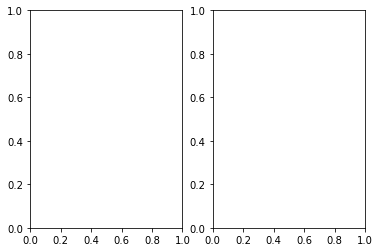

In [9]:
# 정규화 작업을 포함해서 모델학습 진행
# 이번에는 min-max scaling으로 진행
# sklearn 기능 이용

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model  # linear regression 모델
from scipy import stats  # 이상치 처리
from sklearn.preprocessing import MinMaxScaler # 정규화 처리

figure = plt.figure()

python_ax = figure.add_subplot(1,2,1)
sklearn_ax = figure.add_subplot(1,2,2)

# Raw data set loading
df = pd.read_csv('./data/ozone.csv')
display(df.head())
training_data = df[['Ozone','Temp']]
display(training_data)

# 데이터에 결치값 존재
# 결치값 삭제
training_data.dropna(how='any',
                     inplace=True)

zscore_threshold = 2.0
outlier = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold]
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier,invert=True)]

# 정규화 처리
display(training_data.head())

# scaler를 만들어요
scaler_x = MinMaxScaler()  # 온도 처리를 위한 scaler
scaler_t = MinMaxScaler()  # 오존량 처리를 위한 scaler

scaler_x.fit(training_data['Temp'].values.reshape(-1,1))
scaler_t.fit(training_data['Ozone'].values.reshape(-1,1))

scaled_Temp = scaler_x.transform(training_data['Temp'].values.reshape(-1,1))
scaled_Ozone = scaler_t.transform(training_data['Ozone'].values.reshape(-1,1))

training_data['Temp'] = scaled_Temp
training_data['Ozone'] = scaled_Ozone

display(training_data.head())

# Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)


# weight, bias
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function
def loss_func(input_data):
    W = input_data[0].reshape(1,1)
    b = input_data[1]
    
    y = np.dot(x_data,W) + b
    return np.mean(np.power(t_data-y,2))

# predict
def predict(x):
    y = np.dot(x,W) + b
    
    return y

# learning rate
learning_rate = 1e-4

# 반복 학습
for step in range(300000):
    
    # ravel()은 다차원 배열을 1차원 배열로 바꿈
    input_param = np.concatenate((W.ravel(), b.ravel()),axis=0)  # [W b]
    
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)
    
    W = W - derivative_result[0].reshape(1,1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b : {}, loss : {}'.format(W, b, loss_func(input_param)))


In [10]:
# predict
# 아래처럼하면 안되죠!!!
# result = predict([[62]])   # [[16.88715564]]   # [[52.68909775]]

predict_data = np.array([[62]])
scaled_predict_data = scaler_x.transform(predict_data)
python_result = predict(scaled_predict_data)

python_result = scaler_t.inverse_transform(python_result)

print(python_result)     # [[5.51549383]]

[[6.22969982]]


In [11]:
# sklearn 구현

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv('./data/ozone.csv')
training_data = df[['Ozone', 'Temp']]
training_data.dropna(how='any',
                     inplace=True)   # how='any' : 결치가 존재하는 행을 삭제

# 데이터에 이상치가 있는지 확인하고 제거
zscore_threshold = 2.0
outlier = training_data['Ozone'][(np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold)]
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]

# 정규화는 안해도 되요! sklearn이 알아서 해줘요!

# Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# model 생성
model = linear_model.LinearRegression()

# model 학습
model.fit(x_data, t_data)

# 예측
result = model.predict(np.array([[62]]))
print('sklearn으로 구한 온도가 62도 일때의 오존량 : {}'.format(result))  
# [[4.51299041]]

sklearn으로 구한 온도가 62도 일때의 오존량 : [[4.51299041]]


C:\Users\user\AppData\Local\Temp\ipykernel_19736\2800953761.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(how='any',


In [12]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [13]:
import numpy as np
import pandas as pd

def numerical_derivative(f,x):    # x : ndarray [1.0  2.0]
    
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   # derivative_x : [0.0  0.0]
    
    # iterator를 이용해서 입력변수 x에 대한 편미분을 수행!
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        
        idx = it.multi_index 
        tmp = x[idx]              # tmp : 1.0
        
        x[idx] = tmp + delta_x    # x : ndarray [1.0001  2.0]
        fx_plus_delta = f(x)
        
        x[idx] = tmp - delta_x    # x : ndarray [0.9999  2.0]  
        fx_minus_delta = f(x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp              #  x : ndarray [1.0  2.0]  
        it.iternext()
        
    return derivative_x

# raw data
df = pd.read_csv('./data/student_exam_score.csv')
display(df.head())

# 결측치, 이상치 존재X
# 각 변수의 scale이 비슷하기 때문에 정규화도 굳이 필요하지X

# training data set
x_data = df.drop('exam', axis=1, inplace=False)
t_data = df.iloc[:,-1].values.reshape(-1,1)

# Weight, bias
W = np.random.rand(3,1)
b = np.random.rand(1)

# loss function
def loss_func(input_data):    # [w1  w2  w3  b]
    
    input_w = input_data[:-1].reshape(-1,1)
    input_b = input_data[-1:]
    
    y = np.dot(x_data,input_w) + input_b
    
    return np.mean(np.power(t_data-y,2))   # MSE(평균제곱오차)

# predict
def predict(x):
    y = np.dot(x,W) + b
    return y

# learning_rate
learning_rate = 1e-5

# 반복 학습
for step in range(300000):
    
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)  # [w1 w2 w3 b]
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[:-1].reshape(-1,1)
    b = b - derivative_result[-1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b:{}, loss:{}'.format(W, b, loss_func(input_param)))
       

,quiz1,quiz2,quiz3,exam
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


W : [[0.54142255]
 [0.87089138]
 [0.87816304]], b:[0.505136], loss:503.54702195714816
W : [[0.35603229]
 [0.52906095]
 [1.12286433]], b:[0.45075178], loss:6.179658054509815
W : [[0.35598876]
 [0.52923776]
 [1.12339682]], b:[0.39569331], loss:6.16955207991159
W : [[0.35598815]
 [0.52939053]
 [1.12390347]], b:[0.34126788], loss:6.159677280970288
W : [[0.35598758]
 [0.52954153]
 [1.12440428]], b:[0.28746846], loss:6.1500283368012445
W : [[0.35598701]
 [0.5296908 ]
 [1.12489933]], b:[0.23428784], loss:6.140600081691341
W : [[0.35598645]
 [0.52983834]
 [1.12538868]], b:[0.18171891], loss:6.131387468076822
W : [[0.35598589]
 [0.52998419]
 [1.12587241]], b:[0.12975463], loss:6.122385563840976
W : [[0.35598534]
 [0.53012837]
 [1.12635057]], b:[0.07838805], loss:6.113589549673666
W : [[0.3559848 ]
 [0.53027088]
 [1.12682323]], b:[0.02761228], loss:6.104994716491268


In [14]:
# predict
result = predict(np.array([[89, 100, 95]]))
print(result)   # [[191.77512112]]

[[191.79378921]]


In [15]:
# sklearn 구현
from sklearn import linear_model

model = linear_model.LinearRegression()

model.fit(x_data, t_data)

result_sklearn = model.predict(np.array([[89, 100, 95]]))
print(result_sklearn)   # [[192.50147537]]

[[192.50147537]]


C:\Users\user\anaconda3\envs\machine\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
